# Creating Maps

Similar to Pandas, GeoPandas has a `plot()` method that can plot geospatial data using Matplotlib.

We will work with census data to create a choropleth map of population density. We will start with a shapefile of census tracts, and join it with tabular data to get a GeoDataframe with census tract geometry and correponding populations. 

In [1]:
import geopandas as gpd
import os
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Read the census tracts shapefile as a GeoDataframe

In [2]:
data_pkg_path = 'data'
folder = 'census'
filename = 'tl_2019_06_tract.shp'
file_path = os.path.join(data_pkg_path, folder, filename)
tracts = gpd.read_file(file_path)

The `plot()` method will render the data to a plot.

Reference: [geopandas.GeoDataFrame.plot](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html)

You can supply additional style options to change the appearance of the map.

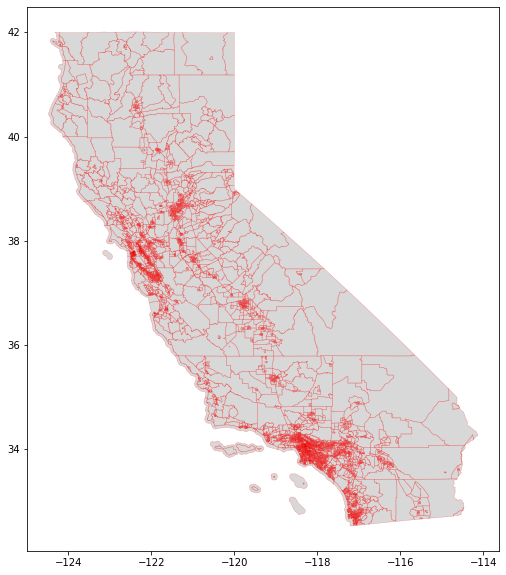

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
tracts.plot(ax=ax, facecolor='grey', edgecolor='red', linewidth=0.5, alpha=0.3)
plt.show()

The shapefile does not have any demographic data columns. But we have a CSV file containing a variety of population statistics for each tract. We read this file as a Pandas DataFrame.

In [17]:
data_pkg_path = 'data'
folder = 'census'
filename = 'ACSST5Y2019.S0101_data.csv'
file_path = os.path.join(data_pkg_path, folder, filename)
table = pd.read_csv(file_path, skiprows=[1])

To join this DataFrame with the GeoDataFrame, we need a column with unique identifiers. We use the `GEOID` column and process the id so they match exactly in both datasets.

In [18]:
filtered = table[['GEO_ID','NAME', 'S0101_C01_001E']]
filtered = filtered.rename(columns = {'S0101_C01_001E': 'Population', 'GEO_ID': 'GEOID'})

filtered['GEOID'] = filtered.GEOID.str[-11:]

Finally, we do a table join using the `merge` method.

In [19]:
gdf = tracts.merge(filtered, on='GEOID')

For creating a choropleth map, we must normalize the population counts. US Census Bureau [recommends](https://www.census.gov/quickfacts/fact/note/US/LND110210) calculating the population density by dividing the total population by the land area. The original shapefile contains a column `ALAND` with the land area in square kilometers. Using it, we compute a new column `density` containing the persons per square kilometer.

In [20]:
gdf['density'] = 1e6*gdf['Population']/gdf['ALAND']

For a choropleth map, we can specify a color ramp and classification scheme. 

References: 
- [Matplotlib Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Mapclassify Classification Schemes](https://pysal.org/mapclassify/generated/mapclassify.classify.html#mapclassify.classify)

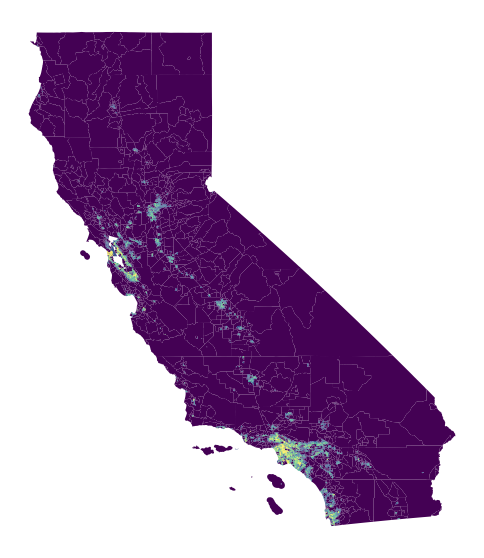

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', scheme='quantiles')
ax.set_axis_off()
plt.show()

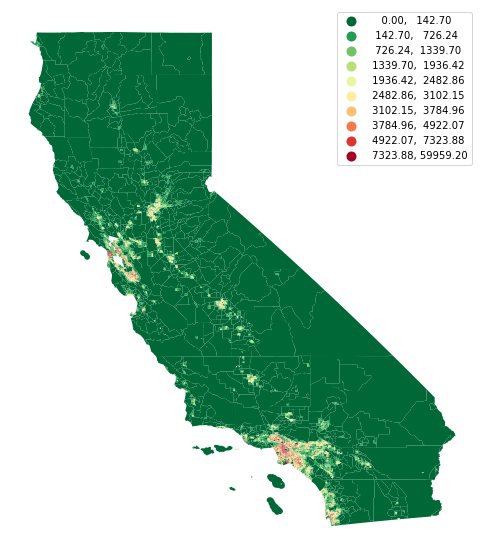

In [21]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='quantiles', k=10, legend=True)
ax.set_axis_off()
plt.show()

Instead of the class breaks being determined by the classification scheme, we can manually specify the ranges. 

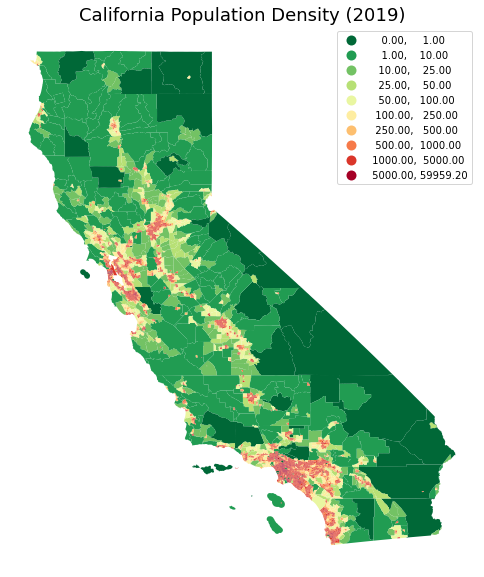

In [24]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined', 
         legend=True, classification_kwds=dict(bins=[1,10,25,50,100, 250, 500, 1000, 5000]))
ax.set_axis_off()
plt.title('California Population Density (2019)', size = 18)

output_folder = 'output'
output_path = os.path.join(output_folder, 'california_pop.png')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Plot the census tracts geodataframe `tracts` with just outlines and no fill color.

Hint: The styling options as specified as keyword arguments to the `plot()` function. Set the `facecolor` option to `'none'` for no fills. Check the [*style_kwds* parameter](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) of the `plot()` method for more details.

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
tracts.plot(ax=ax)
plt.show()